In [1]:
import pandas as pd
import altair as alt

import numpy as np
from datetime import datetime

In [2]:
def line_bars_grafico(df_anio, df_ramo):
    
    # Variables to melt
    l_operaciones = ['Emisiones','Refa_Reno','Anulaciones','Otros_Endosos']
    l_vars = ['Fecha','Año','Ramo']

    # Data sources
    s_anio = pd.melt(df_anio, id_vars=l_vars[:2] , value_vars=l_operaciones)
    s_ramo = pd.melt(df_ramo, id_vars=l_vars , value_vars=l_operaciones)
    

    # Conditional Variables
    brush = alt.selection_interval(encodings=['x'])  # U: Active on the top panel 
    click = alt.selection_multi(encodings=['color']) # U: Active on the bottom panel 

    
    # Chart Variables
    x_line = alt.X('Fecha', axis = alt.Axis(title = 'Fechas', grid = False, labelAngle=-45))
    y_line = alt.Y('value', axis = alt.Axis(title = 'Nº Operaciones', grid = True))
    color_line = alt.condition(brush, alt.Color(shorthand='variable:N'), alt.value('lightgray'))
    
    x_bar = alt.X('value', axis = alt.Axis(title = 'Cantidad de Operaciones', grid = True))
    y_bar = alt.Y('Ramo', axis = alt.Axis(title = 'Ramos', grid = False))   
    color_bar = alt.condition(click, alt.Color(shorthand='variable:N'), alt.value('lightgray'))

    
    
    # Chart
    line = alt.Chart(s_anio).mark_line().encode(x = x_line, y = y_line,  color = color_line 
                                          ).properties(width=600
                                          ).add_selection(brush
                                          ).transform_filter(click)
    
    bar = alt.Chart(s_ramo).mark_bar().encode(x = x_bar, y = y_bar,  color = color_bar 
                                        ).properties(width=600
                                        ).add_selection(click
                                        ).transform_filter(brush)
    watermark = alt.Chart(s_ramo).mark_text(align='center', fontSize=12, opacity=0.5, text='Ramiro Gallo - Seguime en Linkedin haciendo click aca',
                                      ).encode(href='https://www.linkedin.com/in/ramirogallo/:N').properties(width=600)
    
    chart = alt.vconcat(line,bar, watermark, title= 'Analisis de Operaciones' ).configure_axis(labelFontSize=12)
    chart.save('../0_Graphics/Operaciones/Movimiento_Operaciones_Ramo.html')
    
    return chart

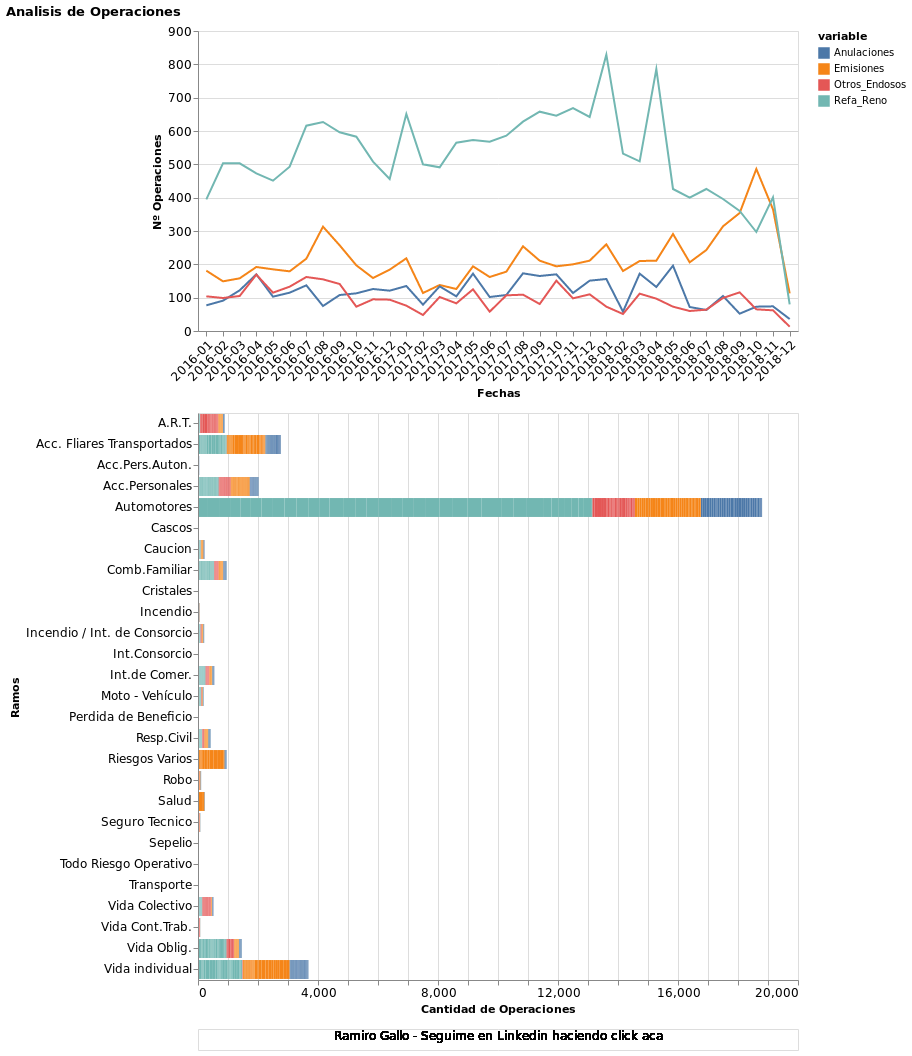

In [3]:
op_anio = '../0_Files/Procesados/Consolidado_Operaciones.csv'
df_anio = pd.read_csv(op_anio)

op_ramo = '../0_Files/Procesados/Consolidado_Operaciones_Ramo.csv'
df_ramo = pd.read_csv(op_ramo)

line_bars_grafico(df_anio, df_ramo)
